# Data Manipulation


In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house_data = pd.read_csv("house_prices.csv")

In [4]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
house_data["price"]

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [6]:
house_data.isnull().values.any()

False

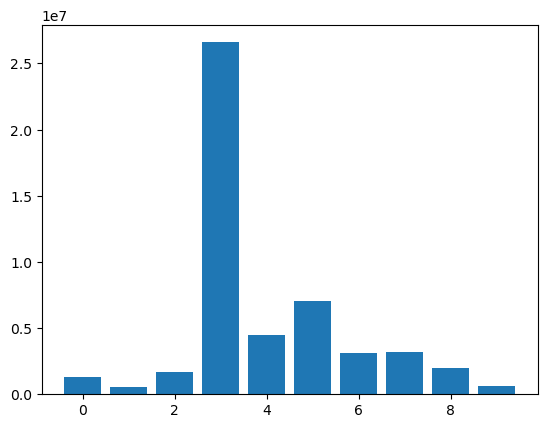

In [8]:
plt.bar(house_data["bedrooms"],house_data["price"])
plt.show()

Text(0.5, 1.0, 'Bedrooms VS Price')

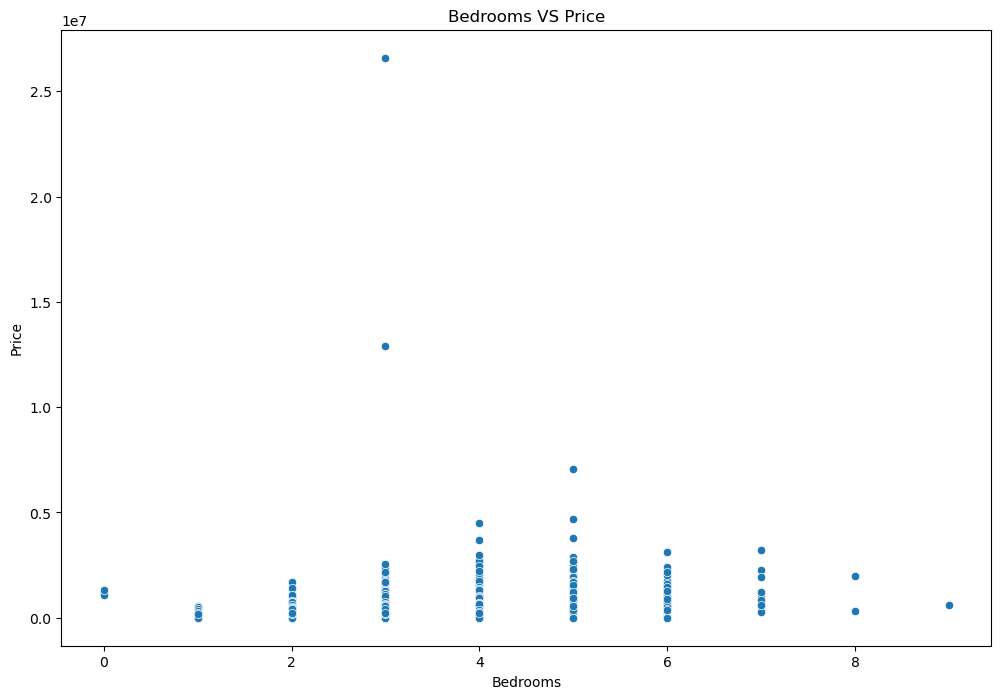

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=house_data, x= "bedrooms", y= "price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms VS Price")

Text(0.5, 1.0, 'Living Room size VS Price')

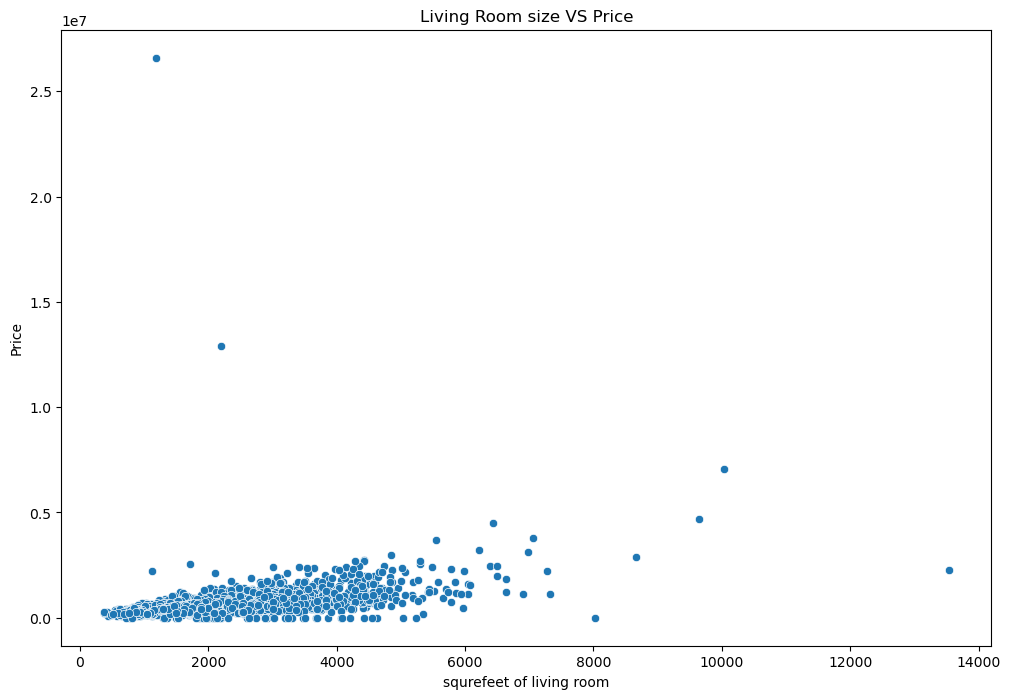

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=house_data, x= "sqft_living", y= "price")
plt.xlabel("squrefeet of living room")
plt.ylabel("Price")
plt.title("Living Room size VS Price")

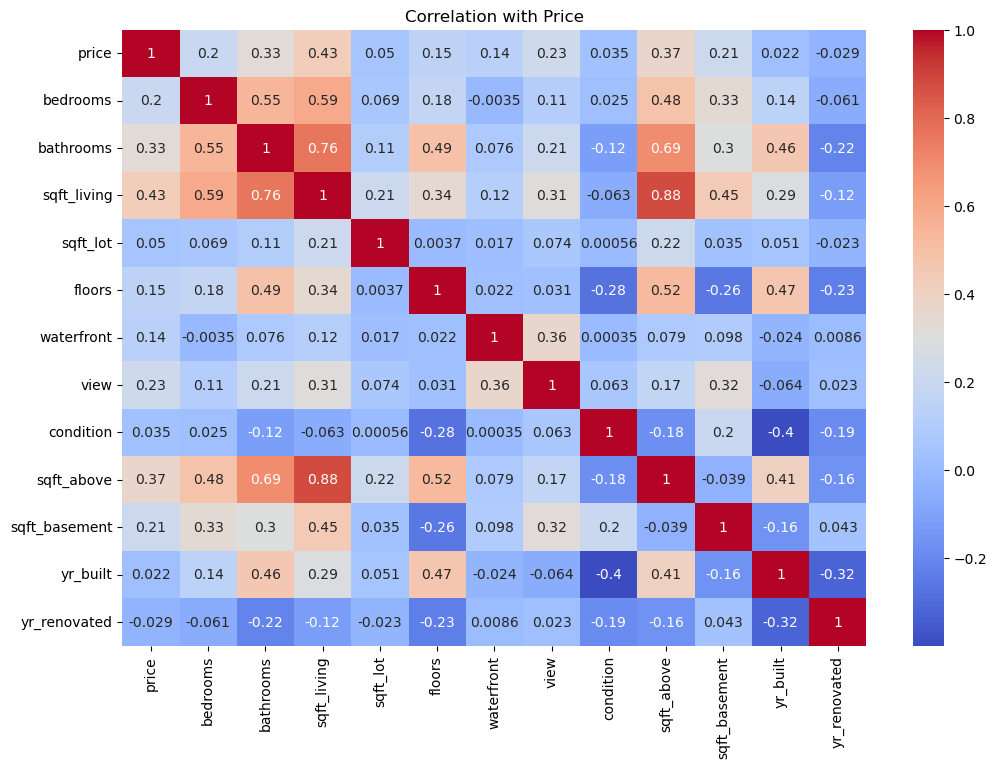

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(house_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

# Models

Linear regressor

In [28]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [37]:
x = house_data[["bedrooms"]] 
y = house_data[["price"]]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [43]:
linear_regressor = LinearRegression()


In [44]:
linear_regressor.fit(x_train,y_train)


LinearRegression()

In [45]:
y_pred = linear_regressor.predict(x_test)

In [46]:
y_pred

array([[ 500468.08622422],
       [ 627919.73293365],
       [ 245564.79280535],
       [ 627919.73293365],
       [ 627919.73293365],
       [ 245564.79280535],
       [ 500468.08622422],
       [ 755371.37964309],
       [ 627919.73293365],
       [ 500468.08622422],
       [ 627919.73293365],
       [ 627919.73293365],
       [ 627919.73293365],
       [ 627919.73293365],
       [ 500468.08622422],
       [ 373016.43951478],
       [ 627919.73293365],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 755371.37964309],
       [ 373016.43951478],
       [ 627919.73293365],
       [ 627919.73293365],
       [ 373016.43951478],
       [ 627919.73293365],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 627919.73293365],
       [ 373016.43951478],
       [ 373016.43951478],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 500468.08622422],
       [ 500468.08622422],
 

In [49]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(y_test,y_pred))

369176.46053269214

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
tree_regressor = DecisionTreeRegressor()

In [58]:
tree_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
y_pred = tree_regressor.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
mean_squared_error(y_pred,y_test)

542859409170.22943

In [62]:
r2_score(y_pred,y_test)

-26.632977919926788

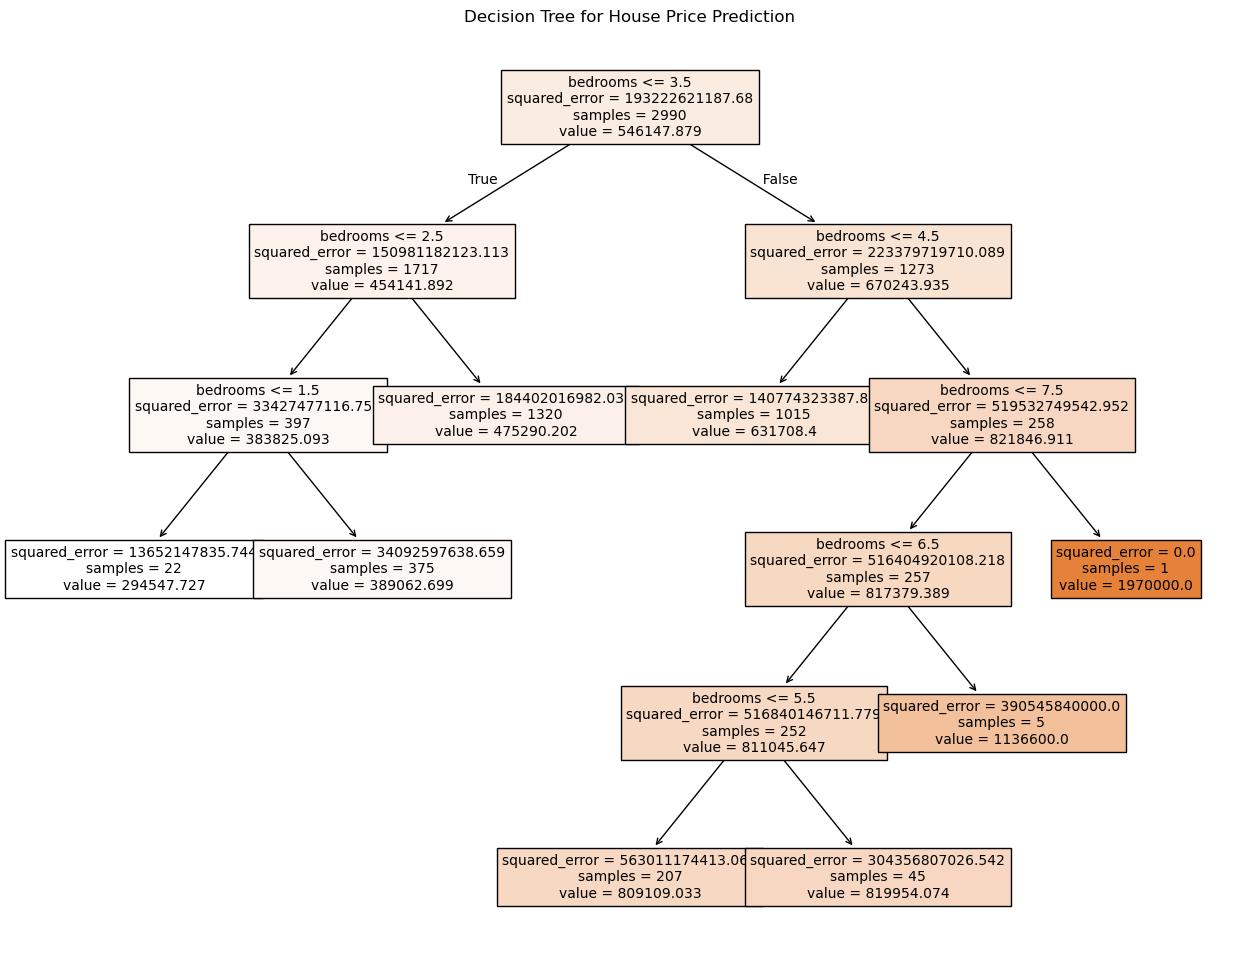

In [71]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 12))
plot_tree(tree_regressor, feature_names=x.columns, filled=True, fontsize=10)
plt.title("Decision Tree for House Price Prediction")
plt.show()

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


X = house_data[["bedrooms", "sqft_living", "bathrooms"]]     
y = house_data["price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)






In [80]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

In [81]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 500835359541.51733
R² Score: 0.08788802844116039
